In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing movie dataset
data = pd.read_csv('tmdb_movies_data.csv')   
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
# finding the statistics of each variable
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
# to check which variable has a NULL data as it should not be in our dataset
data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
# cahnge the NULL values to "0"
data.fillna(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,0,Bruce Brown,0,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,0,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,0,Eldar Ryazanov,0,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,0,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [6]:
# count the number of dupllicate rows
sum(data.duplicated())

1

In [7]:
# removing the duplicate rows
data.drop_duplicates(inplace = True)
print("After Removing Duplicate Values (Rows,Columns) : ",data.shape)

After Removing Duplicate Values (Rows,Columns) :  (10865, 21)


In [8]:
# changing the date format which was previously in a string format
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'].head(10)

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
5   2015-12-25
6   2015-06-23
7   2015-09-30
8   2015-06-17
9   2015-06-09
Name: release_date, dtype: datetime64[ns]

In [9]:
# Removing redundant variables that would not be used
data.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("After Removing Unused Columns (Rows,Columns) : ",data.shape)

After Removing Unused Columns (Rows,Columns) :  (10865, 15)


In [10]:
# There are values in the dataset that has a value of 0 in its budget and revenue therefore it is providing an incorrect/incomplete data. Thus removing them will give a more accurate dataset
print("Rows With Zero Values In The Budget Column:",data[(data['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",data[(data['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


### 1. Which movie has the highest and lowest profit?

In [11]:
data['Profit'] = data['revenue'] - data['budget']

In [12]:
# creating a fn to find max and min of profit
def find(x):
    low_index = data[x].idxmin()
    high_index = data[x].idxmax()
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[low_index,:])
    
    print("Highest:", data['original_title'][high_index])
    print("Lowest:", data['original_title'][low_index])
    

In [13]:
find('Profit')

Highest: Avatar
Lowest: The Warrior's Way


### 2. Rank the Top 10 movies based on their profits

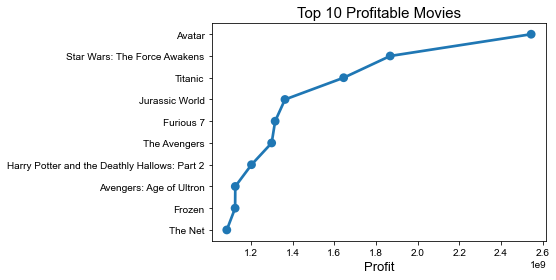

In [14]:
info = pd.DataFrame(data['Profit'].sort_values(ascending = False))
info['original_title'] = data['original_title']
graph = list(map(str,(info['original_title'])))

x = list(graph[:10])
y = list(info['Profit'][:10])

ax = sns.pointplot(x=y,y=x)

sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

### 3. Which movie has the highest and lowest Revenue?

In [15]:
find('revenue')

Highest: Avatar
Lowest: Wild Card


### 4. Rank the Top 10 movies based on their Revenue

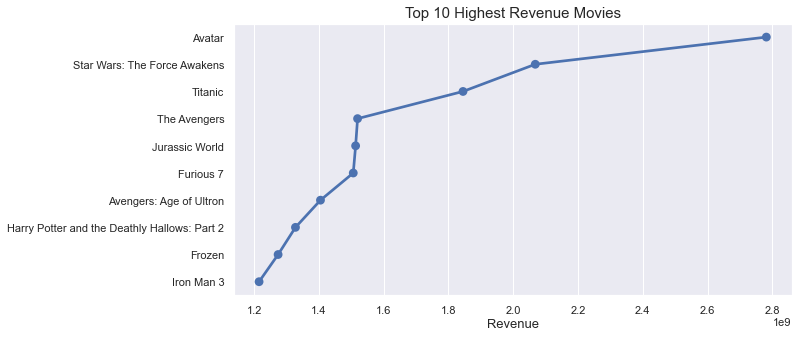

In [16]:
info = pd.DataFrame(data['revenue'].sort_values(ascending = False))
info['original_title'] = data['original_title']
graph = list(map(str,(info['original_title'])))

x = list(graph[:10])
y = list(info['revenue'][:10])

ax = sns.pointplot(x=y,y=x)

sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

### 5. Movie with Highest and Lowest Rating 

In [17]:
find('vote_average')

Highest: The Story of Film: An Odyssey
Lowest: Transmorphers


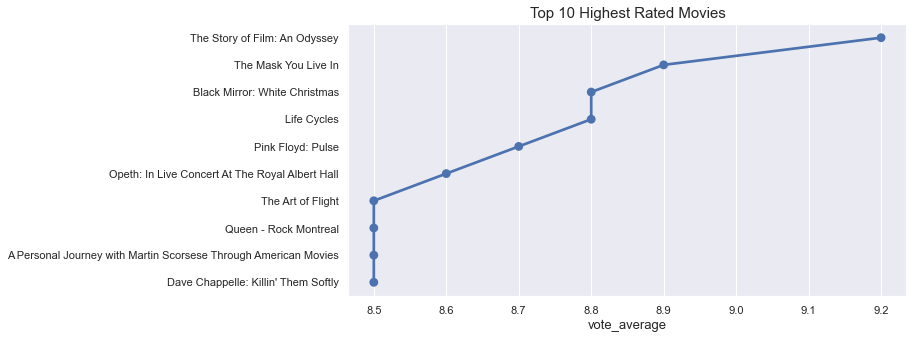

In [18]:
info = pd.DataFrame(data['vote_average'].sort_values(ascending = False))
info['original_title'] = data['original_title']
graph = list(map(str,(info['original_title'])))

x = list(graph[:10])
y = list(info['vote_average'][:10])

ax = sns.pointplot(x=y,y=x)


sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("vote_average",fontsize = 13)
sns.set_style("darkgrid")

### 6. Does popularity affect revenue?

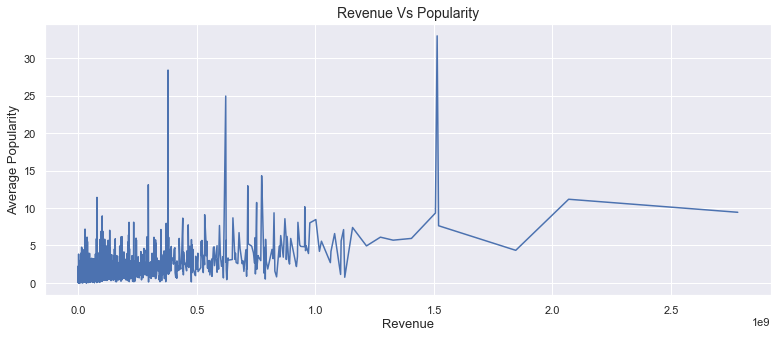

In [19]:
data.groupby('revenue')['popularity'].mean().plot(figsize = (13,5))

plt.title("Revenue Vs Popularity",fontsize = 14)

plt.xlabel('Revenue',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

### 7. Revenue VS Budget

Correlation Between Revenue And Budget :  0.6885561524636727


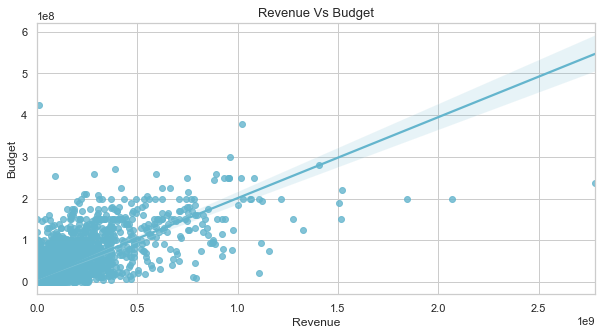

In [20]:
ax = sns.regplot(x=data['revenue'], y=data['budget'],color='c')

ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

data['budget'] = data['budget'].replace(0,np.NAN)
data['revenue'] = data['revenue'].replace(0,np.NAN)
data['Profit'] = data['Profit'].replace(0,np.NAN)

data_corr = data.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])


### 8. Profit VS Budget

Correlation Between Profit And Budget :  0.5383810819019572


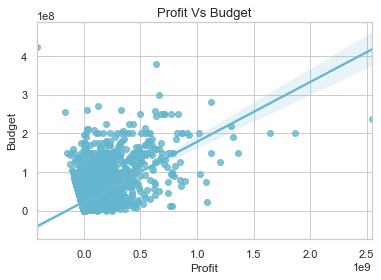

In [21]:
ax = sns.regplot(x=data['Profit'], y=data['budget'],color='c')

ax.set_title("Profit Vs Budget",fontsize=13)
ax.set_xlabel("Profit",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

data['budget'] = data['budget'].replace(0,np.NAN)
data['revenue'] = data['revenue'].replace(0,np.NAN)
data['Profit'] = data['Profit'].replace(0,np.NAN)

data_corr = data.corr()

print("Correlation Between Profit And Budget : ",data_corr.loc['Profit','budget'])

### 9. Release Year VS Vote Average

Correlation Between Release Year And Vote Average :  -0.11757558609467468


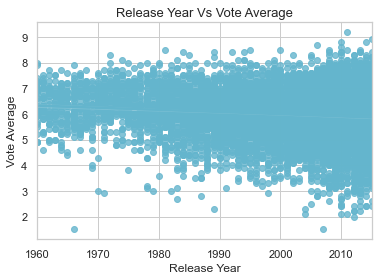

In [22]:
ax = sns.regplot(x=data['release_year'], y=data['vote_average'],color='c')

ax.set_title("Release Year Vs Vote Average",fontsize=13)
ax.set_xlabel("Release Year",fontsize=12)
ax.set_ylabel("Vote Average",fontsize=12)

sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
print("Correlation Between Release Year And Vote Average : ",data_corr.loc['release_year','vote_average'])

### 10. Popularity VS Profit

Correlation Between Popularity And Profit :  0.6159162443059016


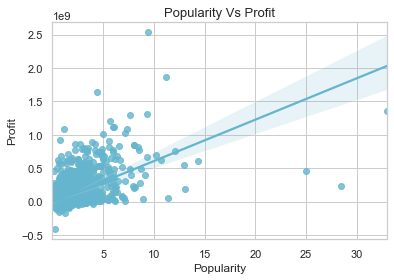

In [23]:
ax = sns.regplot(x=data['popularity'],y=data['Profit'],color='c')

ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','Profit'])

CONCLUSION

1. Budget vs Revenue : Positive correlation of 0.68. There is a good possibility that movies with higher investments result in better revenues.
2. Profit Vs Budget : Positive correlationof 0.53. There is a good possibility that movies with higher investments result in better Profit.
3. Release Year Vs Vote Average : Negative correlation of -0.11. Movie ratings(vote average) does not depends on the release year.
4. Popularity Vs Profit : Positive correlation of 0.61. Movie with high popularity tends to earn high profit.

### 11. Genre with Highest Release of Movies

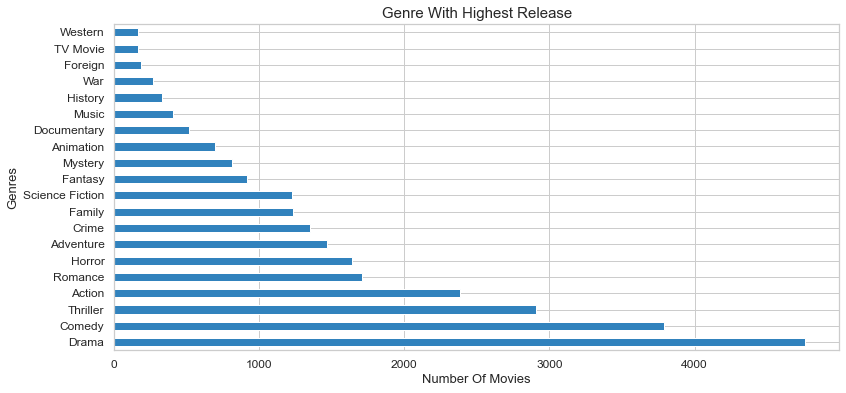

In [24]:
def count_genre(x):
    data_plot = data[x].str.cat(sep = '|')
    fig = pd.Series(data_plot.split('|'))
    info = fig.value_counts(ascending=False)
    return info

total_genre_movies = count_genre('genres')
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

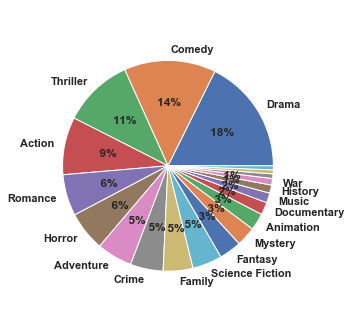

In [25]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

Conclusion

1. Drama (4761)
2. Comedy (3793)
3. Thriller (2908)

Therefore the drama genre has the highest release of movies

###  12. Which genres are most popular from year to year

In [26]:
genre_details = list(map(str,(data['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']
year = np.array(data['release_year'])
popularity = np.array(data['popularity'])
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [27]:
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817532,1.534066,1.097634,...,0.608896,0.520337,0.755137,0.977663,1.034638,0.586530,0.732253,0.755530,1.174435,1.614759
Science Fiction,-0.467064,-0.361952,-0.640003,-0.646572,-0.667888,-0.869288,0.097082,-0.634089,1.452081,-0.710447,...,-0.285369,-0.305635,0.082456,0.679288,-0.104266,0.212188,0.189865,0.575138,0.902119,1.231957
Fantasy,-0.528631,-0.744050,-0.691929,-0.895883,-0.012691,-0.992961,-0.585750,-0.706100,-0.055098,-0.771756,...,0.064256,0.322410,0.008741,0.178378,0.153510,0.028812,0.081027,-0.182739,-0.108344,-0.320493
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.517043,0.209143,0.593035,...,0.085715,0.302191,0.298300,-0.395319,-0.171136,-0.059809,0.092316,0.347388,-0.219402,0.027262
Western,0.705451,-0.588007,-0.266409,-0.863575,-1.009777,-0.527569,-0.028313,-0.775331,-0.824684,0.996730,...,-1.032584,-1.024569,-1.058297,-1.111565,-0.974311,-0.992158,-0.868553,-0.974491,-0.925887,-0.759302


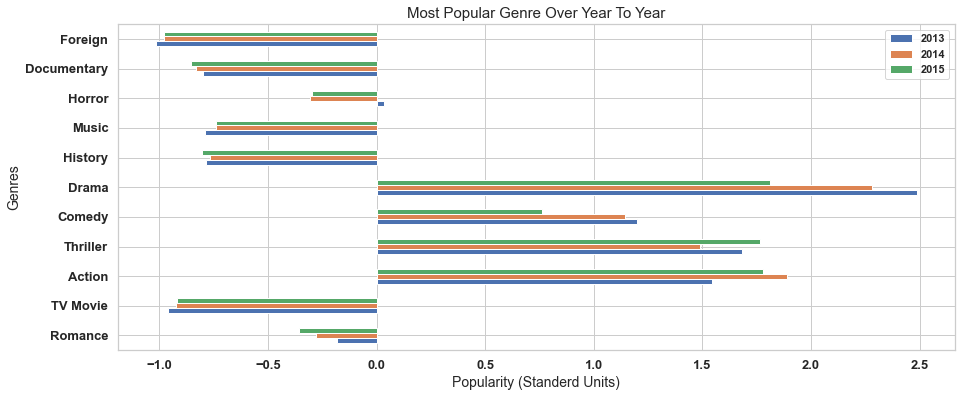

In [28]:
popular_genre.iloc[10:,53:].plot(kind='barh',figsize = (15,6),fontsize=13)
plt.title("Most Popular Genre Over Year To Year",fontsize=15)
plt.xlabel("Popularity (Standerd Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

<AxesSubplot:>

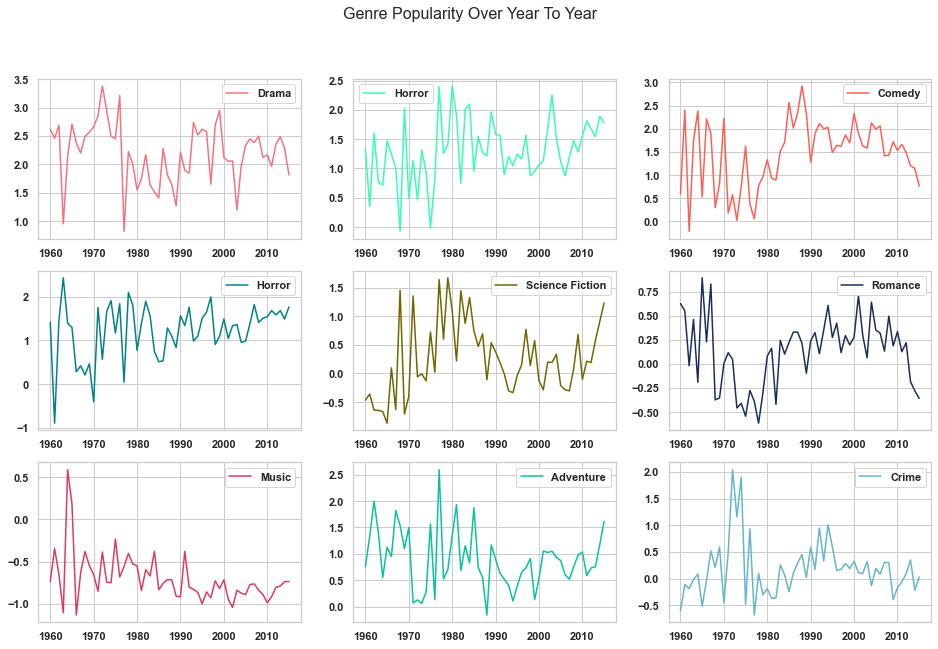

In [29]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(3,3,figsize = (16,10))
fig.suptitle('Genre Popularity Over Year To Year',fontsize = 16)
popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
popular_genre.loc['Action'].plot(label = "Horror",color='#33FFB5',ax = ax[0][1],legend=True)
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
popular_genre.loc['Thriller'].plot(label = "Horror",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Music'].plot(label = "Music",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='c',ax = ax[2][2],legend=True)

### 13. Top 20 Director Who Directs the Most Movies

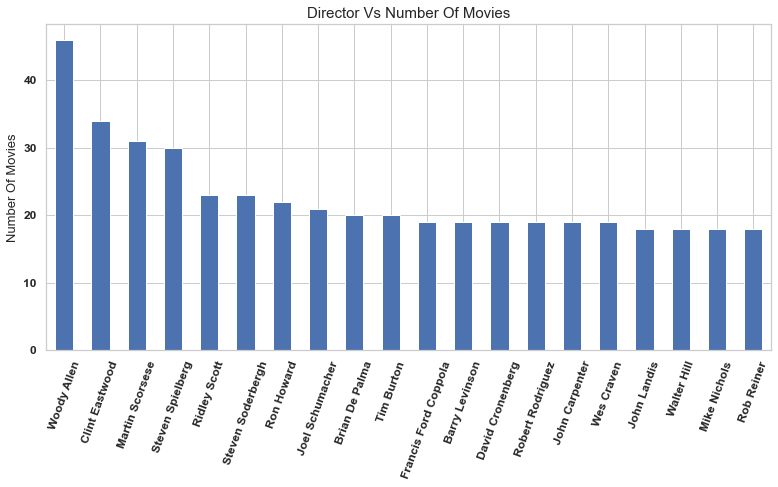

In [30]:
count_director_movies = count_genre('director')
count_director_movies.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

### 14. What Kind Of Properties Are Associated With Movies With High Revenue?

In [31]:
info = pd.DataFrame(data['revenue'].sort_values(ascending=False))
data_set = ['id','popularity','budget','original_title','cast','director','runtime','genres','vote_average','release_year']
for i in data_set:
    info[i] = data[i]
info.head(3)

,revenue,id,popularity,budget,original_title,cast,director,runtime,genres,vote_average,release_year
1386,2.781506e+09,19995,9.432768,237000000.0,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,7.1,2009
3,2.068178e+09,140607,11.173104,200000000.0,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
5231,1.845034e+09,597,4.355219,200000000.0,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,7.3,1997


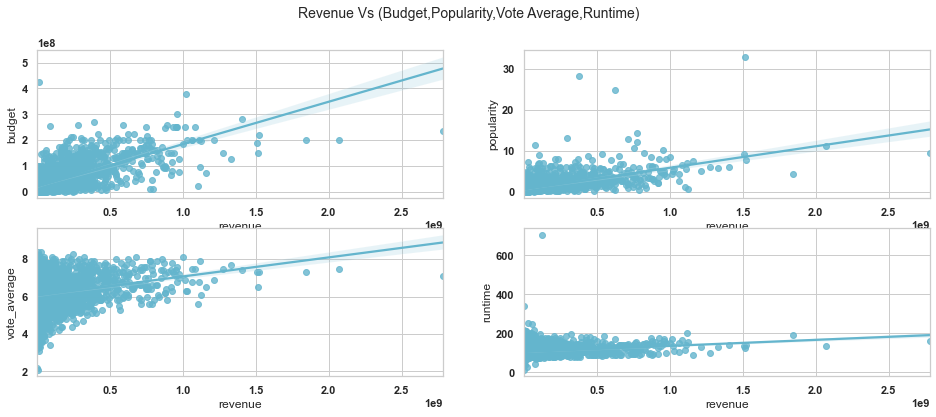

In [32]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
sns.regplot(x=data['revenue'], y=data['budget'],color='c',ax=axes[0][0])
sns.regplot(x=data['revenue'], y=data['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=data['revenue'], y=data['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=data['revenue'], y=data['runtime'],color='c',ax=axes[1][1])
sns.set_style("whitegrid")

In [33]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

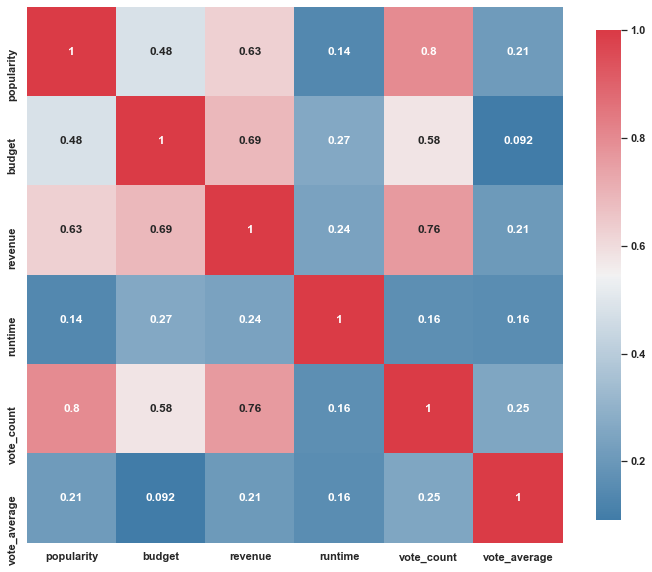

In [34]:
plot_correlation_map(data[['popularity','budget','revenue','runtime','vote_count','vote_average']])

A brief description of the above plots,
_________________________________________________________________________________________________________________
Plot 1: Budget vs Revenue

The revenues do increase slightly at higher levels but the number of movies with high budgets seem scarce. There is a good possibility that movies with higher investments result in better revenues.

Correlation = 0.68

I can't find a relationship here. The revenues don't seem to change with higher vote average.
________________________________________________________________________________________________________________
Plot 2: Popularity vs Revenue

The revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of the movie may be high.

Correlation = 0.62
_________________________________________________________________________________________________________________
Plot 3: Vote Average vs Revenue

The correlation between revenue and vote average is 0.2069. So vote average is not highly related to the revenue.
_________________________________________________________________________________________________________________
Plot 4: Runtime vs Revenue

The correlation between revenue and runtime is 0.2378. So runtime is not highly related to the revenue.

Conclusions
1. Drama is the most popular genre, following by action, comedy and thriller.
2. Drama, Comedy, Thriller and Action are four most-made genres.
3. Maximum Number Of Movies Release In year 2014.
4. 'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.
5. Short or Long duration movies are more popular than long duration movies.
6. Average runtime of the movies are decreasing year by year.
7. May, june, november and december are most popular month for releasing movies, if you want to earn more profit.
7. Revenue is directly connected to the budget.
8. Warner Bros, Universal Pictures and Paramount Pictures production companies earn more life time profit than other production companies.
9. Movies with higher budgets have shown a corresponding increase in the revenues.